## Initial attempt by D. Barco on Thu 11-Sep-2025 @ 18h30 (during tutorial / work period)
### Second attempt on Sat 13-Sep-2025 @ 15h45 (not feeling well, unable to attend tutorial / work period this morning)
### completed Sat 13-Sep-2025 @ 19h05

# Assignment 2

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Linear Regression

Let's set up our workspace and use the **Auto MPG dataset**. This dataset contains several features (such as horsepower, weight, displacement, and acceleration) and a target variable indicating the car's **miles per gallon (MPG)**.

Here, we will model **MPG (continuous outcome)** based on the car's physical and performance characteristics.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import seaborn as sns

# Load the Auto MPG dataset
mpg_data = sns.load_dataset('mpg')

# Drop rows with missing values
mpg_data = mpg_data.dropna(subset=['mpg', 'horsepower', 'weight', 'displacement'])

# Display the DataFrame
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# ** PLEASE IGNORE **
# suggestion from Julia during Thu 11-Sep-2025 tutorial / work period to view ^entire^ dataframe!
pd.set_option("display.max_rows", None)
mpg_data

#### **Question 1:**  
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Auto MPG dataset**:

_(i)_ How many observations (rows) does the dataset contain and also how many variables (columns) does the dataset contain?

In [3]:
# Your answer here...
mpg_data.shape # <-- outputs a tuple?
# mpg_data.shape[0] # --> will output the no. of rows (observations)
# mpg_data.shape[1] # --> will output the no. of columns (predictor variables)

(392, 9)

_(ii)_ What is the 'variable type' of the response variable `mpg` (e.g., 'integer', 'category', etc.) and explain what it is in short? (1-2 sentences at max)

In [4]:
# Your answer here...
mpg_data["mpg"].dtype

dtype('float64')

Your explanation...

'float64' datatype is a 64-bit floating point numeric representation. Basically real number values that include decimal points, with a precision of 64-bits. Some example numbers: 0.728, 99.0, 2025.911, -40.5, etc.


_(iii)_ Find the 5 rows with the greatest `horsepower`.

In [ ]:
# Your answer here... 
mpg_data.nlargest(5, "horsepower") # Cool observation = The top 5 are All AMERICAN vehicles! :-)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala


_(iv)_ How many predictor variables do we have (Hint: all variables other than `mpg`)?

In [6]:
# Your answer here...
# mpg_data.shape[1] - 1 # <-- the intuitive way to do this :-)
mpg_data_predvars = mpg_data.drop(columns = ["mpg"])
mpg_data_predvars.shape[1]

8

You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Data-visualization

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below.

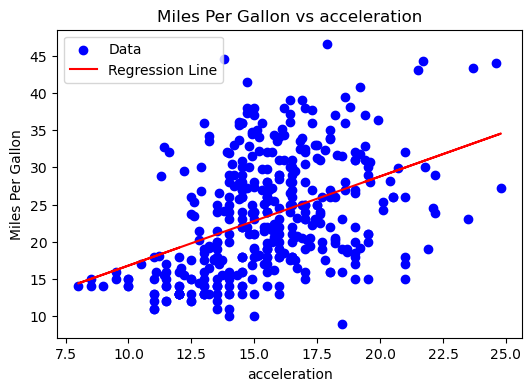

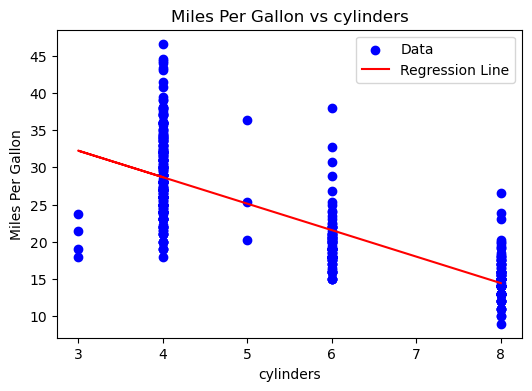

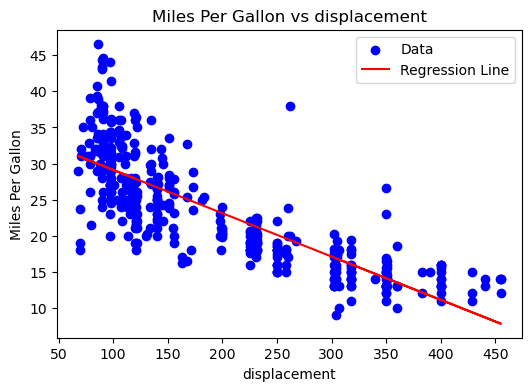

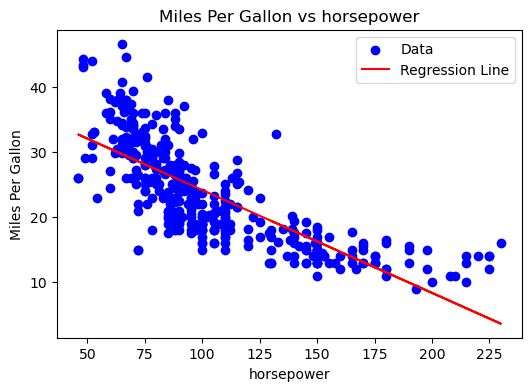

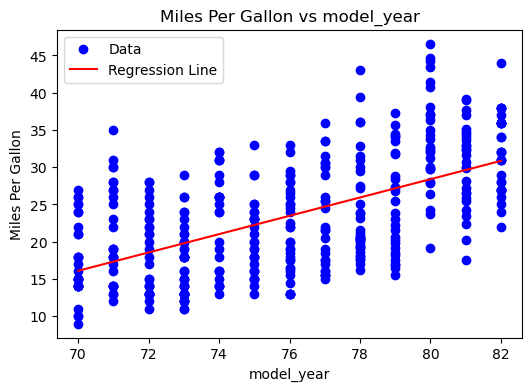

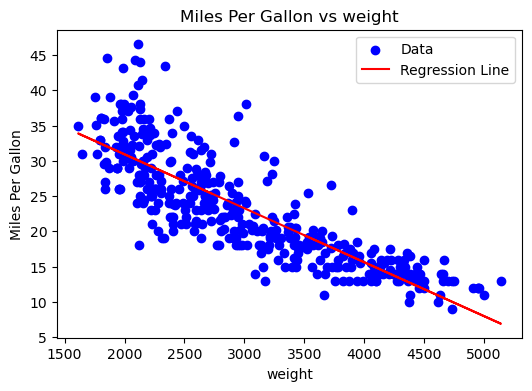

In [7]:
# Exclude the 'mpg' (target variable) and non-numeric columns from the feature names
feature_names = mpg_data.select_dtypes(include=[float, int]).columns.difference(['mpg'])

# Loop through each numeric feature (column) in mpg_data
for feature in feature_names:
    # Extract the feature column and target variable (mpg)
    X_feature = mpg_data[[feature]].values  # Extract as a 2D array
    y = mpg_data['mpg'].values  # Target variable (mpg)
    
    # Create a scatter plot for the feature against the target (mpg)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Miles Per Gallon')
    # plt.title(f'{feature} vs Miles Per Gallon') # <-- title possible "backwards"?? (had messaged Julia to clarify)
    plt.title(f'Miles Per Gallon vs {feature}')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

Answer the following questions:

_(i)_ Describe the associations being plotted ? (i.e., positive association, negative association, no association)

> Your answer here...

Fig. 1 ("Miles Per Gallon vs acceleration"): The line-of-best-fit in the figure shows a positive association (line sloping positive / upwards), implying that as the acceleration increases, the resulting miles per gallon also increases. Does this make intuitive sense? Not really. I would expect that the miles per gallon (fuel consumption) would be constant or likely worsen under heavy acceleration!

Fig. 2 ("Miles Per Gallon vs cylinders"): The line-of-best-fit in the figure shows a negative association (line sloping negative / downwards), implying that as the number of cylinders in the engine increases, the resulting miles per gallon actually decreases. Does this make intuitive sense? Yes, sure. As the number of cylinders increases, the fuel consumption (and the resulting miles per gallon) would worsen.

Fig. 3 ("Miles Per Gallon vs displacement"): The line-of-best-fit in the figure shows a negative association (line sloping negative / downwards), implying that as the engine displacement (size) increases, the resulting miles per gallon actually decreases. Does this make intuitive sense? Yes, sure. Similar to number of cylinders, more fuel needs to be burned, so the fuel consumption (and the resulting miles per gallon) would worsen.

Fig. 4 ("Miles Per Gallon vs horsepower"): The line-of-best-fit in the figure shows a negative association (line sloping negative / downwards), implying that as the engine horsepower increases, the resulting miles per gallon actually decreases. Does this make intuitive sense? Yes, sure. Similar to number of cylinders (Fig. 2) and displacement (Fig. 3), more fuel needs to be burned, so the fuel consumption (and the resulting miles per gallon) would worsen.

Fig. 5 ("Miles Per Gallon vs model_year"): The line-of-best-fit in the figure shows a positive association (line sloping positive / upwards), implying that as the model year increases, the resulting miles per gallon also increases. Does this make intuitive sense? Possibly, although one would think that the model year should not make a difference or have an effect on the MPG. It is possible that over time, car manufacturers are able to make incremental improvements with their engine efficiencies with each vehicle model year, and so there appears to be a positive correlation for MPG vs model year.

Fig. 6 ("Miles Per Gallon vs weight"): The line-of-best-fit in the figure shows a negative association (line sloping negative / downwards), implying that as the vehicle weight increases, the resulting miles per gallon actually decreases. Does this make intuitive sense? Yes, absolutely! Similar to number of cylinders (Fig. 2), displacement (Fig. 3) and horsepower (Fig. 4), more fuel needs to be burned to move a heavier car, so the fuel consumption (and the resulting miles per gallon) would worsen.

_(ii)_ What concept ‘defines’ the plotted line?

> Your answer here...

The plotted line the so-called "line of best fit" using the linear regression model on the data points.
This line-of-best-fit through the data points is the one with the minimal error (difference) between the data points and the actual line.

_(iii)_ Do all data points in the dataset fall perfectly along the plotted line? If not, why might there be deviations between the data points and the line, and what do these deviations indicate about the relationship between the variables?

> Your answer here...

No, all data points do not have to fall perfectly on the "line of best fit"! (Note: the term itself implies that it is the line of "best fit", and not PERFECT fit.) The line is not suggesting actual data, rather it is a model (prediction) of some perceived behaviour or relationship between the variable on the horizontal (x) axis and the variable on the vertical (y) axis. It does not necessarily imply that the x-variable CAUSES the y-variable response! Just that there appears to be a correlation or relationship between the two. In essence,

- if there is less distance ("spread") between the data points and the line-of-best-fit, then this implies a strong relationship.

- if there is larger distances ("more spread") between the data points and the line-of-best-fit, then this suggest a weak(er) relationship.

The actual, real relationship (if any exists) may not be perfectly linear. We are making a fundamental assumption to treat the data as if it could be modeled according to a linear model. So there will always be "error" (better termed "differences") between real-world data and this linear regression (theoretical) model.

#### **Question 3:**  
#### Model fit  
Now, let’s fit a multivariable linear regression model using the general syntax `lm()`. As above, use **mpg** as the response variable **Y**, and all other variables as the predictors.

**Step 1: Split the dataset into train and test sets, using a 75-25 split. (use random_state=42)**

In [8]:
# Your answer here...

mpg_train, mpg_test = train_test_split(mpg_data, train_size = 0.75, random_state = 42)

In [9]:
mpg_data.info() # <-- sanity check -- please ignore -- 392 rows

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [10]:
mpg_train.info() # <-- sanity check -- please ignore -- 392 x 0.75 = 294 (math is ok)

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 267 to 103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           294 non-null    float64
 1   cylinders     294 non-null    int64  
 2   displacement  294 non-null    float64
 3   horsepower    294 non-null    float64
 4   weight        294 non-null    int64  
 5   acceleration  294 non-null    float64
 6   model_year    294 non-null    int64  
 7   origin        294 non-null    object 
 8   name          294 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 23.0+ KB


In [11]:
mpg_test.info() # <-- sanity check -- please ignore -- 392 x 0.25 = 98 (math is ok)

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 79 to 105
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     float64
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     float64
 4   weight        98 non-null     int64  
 5   acceleration  98 non-null     float64
 6   model_year    98 non-null     int64  
 7   origin        98 non-null     object 
 8   name          98 non-null     object 
dtypes: float64(4), int64(3), object(2)
memory usage: 7.7+ KB


**Step 2: Fit the linear regression model.**

In [12]:
# Your code here ...

# numeric_predictors = 🤷‍♂️ Not 100 % sure what is going on here, but am resorting to tutorial / work period chat notes...
# (and of course trial-and-error :-)
numeric_predictors = mpg_train.select_dtypes(include = [float, int])
numeric_predictors = numeric_predictors.drop(columns = "mpg") # <-- exclude the "mpg" column

# Step 1 - define X and y
X_train = mpg_train[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]
y_train = mpg_train["mpg"]

# Step 2 - initialize model (**Note: lm shall actually be a multivariable linear model**)
lm = LinearRegression()

# Step 3 - fit the model on the training data
lm.fit(X_train, y_train)


# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

# Display the coefficients DataFrame
print(coefficients_df)

# lm.coef_ gives the coefficients for each predictor (change in miles per gallon per unit change in each predictor variable)
# lm.intercept_ gives the intercept b_0 (the predicted miles per gallon when all predictors are set to 0)

      predictor     slope  intercept
0     cylinders -0.160143 -15.047371
1  displacement  0.000373 -15.047371
2    horsepower -0.001899 -15.047371
3        weight -0.006457 -15.047371
4  acceleration  0.057588 -15.047371
5    model_year  0.762270 -15.047371


#### **Question 4:** 
#### RMSPE
**Step 3. Finally, we predict on the test data set to assess how well our model does.** 

We will evaluate our final model's test error measured by RMSPE.

In [13]:
# Your code here ...
mpg_test["predicted_mpg"] = lm.predict(mpg_test[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]])

# evaluate model behaviour on test data using RMSPE
rmspe = mean_squared_error(
    y_true = mpg_test["mpg"],
    y_pred = mpg_test["predicted_mpg"]
)**0.5
rmspe

3.1854749513391587

In [14]:
mpg_test.head() # <-- sanity check -- please ignore -- last column contains the predicted_mpg values for the test data set

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,predicted_mpg
79,26.0,4,96.0,69.0,2189,18.0,72,europe,renault 12 (sw),26.003022
276,21.6,4,121.0,115.0,2795,15.7,78,europe,saab 99gle,26.453375
248,36.1,4,91.0,60.0,1800,16.4,78,japan,honda civic cvcc,33.011413
56,26.0,4,91.0,70.0,1955,20.5,71,usa,plymouth cricket,26.891844
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.591137


# Criteria

| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for the number of variables, observations, and data types. | Data inspection is missing or incomplete.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots, histograms) are properly interepreted to explore the relationships between variables. | Data visualization were not correctly interpreted. |
| **Model Initialization**                               | The linear regression model is correctly initialized.            | The linear regression model is not initialized or is incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using appropriate metrics (e.g., RMSE). | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 09/14/2025`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
